# This code was done by following a Youtube video

https://www.youtube.com/watch?v=GiyldmoYe_M&ab_channel=DigitalSreeni

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image

import os
import cv2
from PIL import Image
import numpy as np
import shutil


from tensorflow.keras.models import Sequential

In [2]:
# Origial folder location
data_scr_dir = '/content/drive/MyDrive/Flatiron/Phase 5/Train:Test/Test'


data_dst_folder = '/content/data'


# copy folder from location to local storage

shutil.copytree(data_scr_dir, data_dst_folder)

'/content/data'

In [3]:
# Checking the Length of the Train Directory
print(len(os.listdir(f'{data_dst_folder}/VeryMildDemented/')))
print(len(os.listdir(f'{data_dst_folder}/ModerateDemented/')))
print(len(os.listdir(f'{data_dst_folder}/MildDemented/')))
print(len(os.listdir(f'{data_dst_folder}/NonDemented/')))

2688
1939
2688
2880


In [4]:
# Set up the paths and class labels
data_dir = '/content/data'
class_labels = ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
image_size = (224, 224) # Desired image size

In [5]:
# Load the images and labels:
img = []
lbl = []

for label_idx, label in enumerate(class_labels):
    folder_path = os.path.join(data_dir, label)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file) # get the image
        image = cv2.imread(image_path) # read the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, image_size)  # Resize the image
        img.append(image)
        lbl.append(label_idx)

In [6]:
dataset = np.array(img)
label = np.array(lbl)

In [7]:
label

array([0, 0, 0, ..., 3, 3, 3])

In [8]:
#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [9]:
X_train = X_train /255.
X_test = X_test /255.

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
X_train.shape

(8156, 224, 224, 3)

In [12]:
y_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [13]:
#Define the model.
#Here, we use pre-trained VGG16 layers and add GlobalAveragePooling and dense prediction layers.
#You can define any model.
#Also, here we set the first few convolutional blocks as non-trainable and only train the last block.
#This is just to speed up the training. You can train all layers if you want.
def get_model(input_shape = (224,224,3)):

    vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape = input_shape)

    #for layer in vgg.layers[:-8]:  #Set block4 and block5 to be trainable.
    for layer in vgg.layers:    #Set block5 trainable, all others as non-trainable
        print(layer.name)
        layer.trainable = False #All others as non-trainable.

    x = vgg.output
    x = GlobalAveragePooling2D()(x) #Use GlobalAveragePooling and NOT flatten.
    x = Dense(4, activation="softmax")(x)  #We are defining this as multiclass problem.

    model = Model(vgg.input, x)
    model.compile(loss = "categorical_crossentropy",
                  optimizer = 'adam', metrics=["accuracy"])

    return model

In [14]:
model = get_model(input_shape = (224,224,3))
print(model.summary())

58889256/58889256 [==============================] - 3s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D) 

In [15]:
history = model.fit(X_train, y_train, batch_size=16, epochs=30, verbose = 1,
                    validation_data=(X_test,y_test))

Epoch 1/30
510/510 [==============================] - 20s 22ms/step - loss: 1.3175 - accuracy: 0.3654 - val_loss: 1.2501 - val_accuracy: 0.4174
Epoch 2/30
510/510 [==============================] - 8s 17ms/step - loss: 1.2020 - accuracy: 0.4859 - val_loss: 1.1720 - val_accuracy: 0.4934
Epoch 3/30
510/510 [==============================] - 8s 17ms/step - loss: 1.1302 - accuracy: 0.5449 - val_loss: 1.1088 - val_accuracy: 0.5537
Epoch 4/30
510/510 [==============================] - 8s 17ms/step - loss: 1.0765 - accuracy: 0.5756 - val_loss: 1.0700 - val_accuracy: 0.5635
Epoch 5/30
510/510 [==============================] - 8s 17ms/step - loss: 1.0355 - accuracy: 0.5940 - val_loss: 1.0296 - val_accuracy: 0.6062
Epoch 6/30
510/510 [==============================] - 8s 17ms/step - loss: 1.0016 - accuracy: 0.6069 - val_loss: 1.0004 - val_accuracy: 0.5969
Epoch 7/30
510/510 [==============================] - 8s 17ms/step - loss: 0.9729 - accuracy: 0.6220 - val_loss: 1.0050 - val_accuracy: 0.592

In [16]:
#Check model accuracy on the test data
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

64/64 [==============================] - 3s 33ms/step - loss: 0.7583 - accuracy: 0.6748
Accuracy =  67.48406291007996 %


In [21]:
y_pred = np.argmax(model.predict(X_test), axis=1)


64/64 [==============================] - 2s 21ms/step


In [22]:
y_pred

array([3, 1, 1, ..., 2, 2, 3])

In [23]:
from matplotlib.patches import Rectangle #To add a rectangle overlay to the image
from skimage.feature.peak import peak_local_max  #To detect hotspots in 2D images.
def plot_heatmap(img):

    pred = model.predict(np.expand_dims(img, axis=0))
    pred_class = np.argmax(pred)
    #Get weights for all classes from the prediction layer
    last_layer_weights = model.layers[-1].get_weights()[0] #Prediction layer
    #Get weights for the predicted class.
    last_layer_weights_for_pred = last_layer_weights[:, pred_class]
    #Get output from the last conv. layer
    last_conv_model = Model(model.input, model.get_layer("block5_conv3").output)
    last_conv_output = last_conv_model.predict(img[np.newaxis,:,:,:])
    last_conv_output = np.squeeze(last_conv_output)

    #Upsample/resize the last conv. output to same size as original image
    h = int(img.shape[0]/last_conv_output.shape[0])
    w = int(img.shape[1]/last_conv_output.shape[1])
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)

    heat_map = np.dot(upsampled_last_conv_output.reshape((img.shape[0]*img.shape[1], 512)),
                 last_layer_weights_for_pred).reshape(img.shape[0],img.shape[1])

    #Since we have a lot of dark pixels where the edges may be thought of as
    #high anomaly, let us drop all heat map values in this region to 0.
    #This is an optional step based on the image.
    heat_map[img[:,:,0] == 0] = 0  #All dark pixels outside the object set to 0

    #Detect peaks (hot spots) in the heat map. We will set it to detect maximum 5 peaks.
    #with rel threshold of 0.5 (compared to the max peak).
    peak_coords = peak_local_max(heat_map, num_peaks=5, threshold_rel=0.5, min_distance=10)

    plt.imshow(img.astype('float32').reshape(img.shape[0],img.shape[1],3))
    plt.imshow(heat_map, cmap='jet', alpha=0.30)
    for i in range(0,peak_coords.shape[0]):
        print(i)
        y = peak_coords[i,0]
        x = peak_coords[i,1]
        plt.gca().add_patch(Rectangle((x-25, y-25), 50,50,linewidth=1,edgecolor='r',facecolor='none'))

# Anomalies in 'VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented'

# VeryMildDemented

In [24]:
#Save all images classified as parasited so we can fetch these images
#later and plot heatmaps.
########################################################
#Identify all images classified as parasitized
VMD_image_idx = np.where(y_pred == 0)[0]

#Save all images classified as parasited to a directory (optional, makes sense for large data sets)
#capture it in memory as an array
predicted_as_VMD=[]
for i in VMD_image_idx:
    par_img = X_test[i]
    #plt.imsave("results_classified_as_para/para_"+str(i)+".png", par_img)
    predicted_as_VMD.append(par_img)

predicted_as_VMD = np.array(predicted_as_VMD)

1/1 [==============================] - 0s 132ms/step
0
1


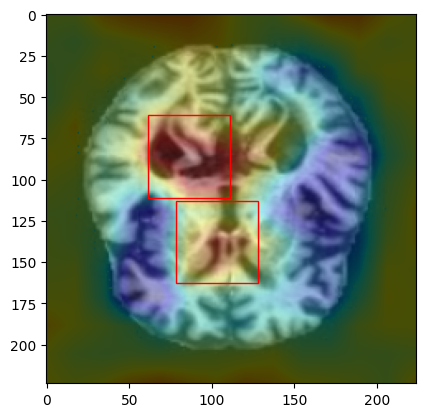

In [35]:
import random
im = random.randint(0,predicted_as_VMD.shape[0]-1)
heat_map =plot_heatmap(predicted_as_VMD[im])


# ModerateDemented

In [26]:
#Save all images classified as parasited so we can fetch these images
#later and plot heatmaps.
########################################################
#Identify all images classified as parasitized
ModDe_image_idx = np.where(y_pred == 1)[0]

#Save all images classified as parasited to a directory (optional, makes sense for large data sets)
#capture it in memory as an array
predicted_as_ModD=[]
for i in ModDe_image_idx:
    par_img = X_test[i]
    #plt.imsave("results_classified_as_para/para_"+str(i)+".png", par_img)
    predicted_as_ModD.append(par_img)

predicted_as_ModD = np.array(predicted_as_ModD)

1/1 [==============================] - 0s 128ms/step
0
1
2
3
4


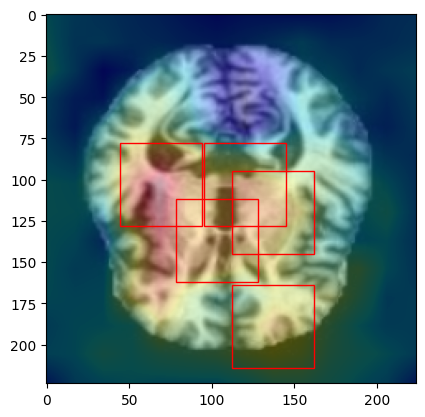

In [27]:
import random
im = random.randint(0,predicted_as_ModD.shape[0]-1)
heat_map =plot_heatmap(predicted_as_ModD[im])


#MildDemented

In [28]:
#Save all images classified as parasited so we can fetch these images
#later and plot heatmaps.
########################################################
#Identify all images classified as parasitized
MidDe_image_idx = np.where(y_pred == 2)[0]

#Save all images classified as parasited to a directory (optional, makes sense for large data sets)
#capture it in memory as an array
predicted_as_MildD=[]
for i in MidDe_image_idx:
    par_img = X_test[i]
    #plt.imsave("results_classified_as_para/para_"+str(i)+".png", par_img)
    predicted_as_MildD.append(par_img)

predicted_as_MildD = np.array(predicted_as_MildD)

1/1 [==============================] - 0s 125ms/step
0
1
2


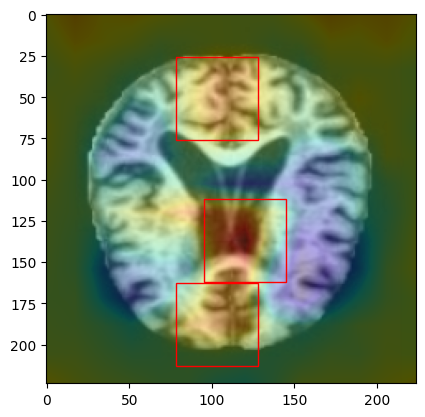

In [29]:
import random
im = random.randint(0,predicted_as_MildD.shape[0]-1)
heat_map =plot_heatmap(predicted_as_MildD[im])

# NonDemented

In [30]:
#Save all images classified as parasited so we can fetch these images
#later and plot heatmaps.
########################################################
#Identify all images classified as parasitized
NonD_image_idx = np.where(y_pred == 3)[0]

#Save all images classified as parasited to a directory (optional, makes sense for large data sets)
#capture it in memory as an array
predicted_as_NonD=[]
for i in NonD_image_idx:
    par_img = X_test[i]
    #plt.imsave("results_classified_as_para/para_"+str(i)+".png", par_img)
    predicted_as_NonD.append(par_img)

predicted_as_NonD = np.array(predicted_as_NonD)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 129ms/step
0
1


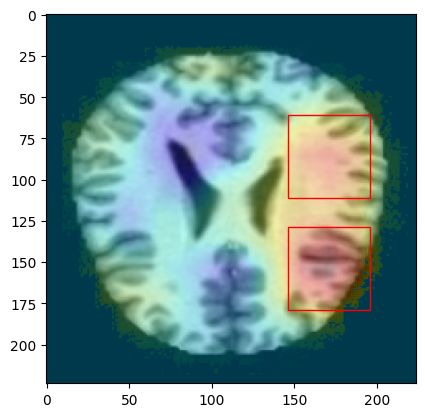

In [31]:
import random
im = random.randint(0,predicted_as_NonD.shape[0]-1)
heat_map =plot_heatmap(predicted_as_NonD[im])